In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
ebv_map = hp.read_map('/Users/mattocallaghan/XPNorm/Data/ebv_lhd.hpx.fits', verbose=False)
#hp.mollview((ebv_map), title='', unit='log(E(B-V) [mag])')
#hp.graticule()
nside = hp.get_nside(ebv_map)
npix = hp.nside2npix(nside)
ordering = 'ring'
pixel_indices = np.arange(npix)

# Get the pixel centers
l, b = hp.pix2ang(nside, pixel_indices,lonlat=True)


idx=np.argwhere((~np.isnan(ebv_map))*(ebv_map<0.008))

coords = SkyCoord(l=l*u.degree, b=b*u.degree, frame='galactic')
ra=coords.icrs.ra.degree
dec=coords.icrs.dec.degree
places=np.stack((ra[idx],dec[idx]),1)


In [9]:
import pandas as pd
df=pd.read_csv('/Users/mattocallaghan/XPNorm/Data/data_high_g')
df=df#.head(len(df)//32)
coords = SkyCoord(ra=df['ra'].values*u.degree, dec=df['dec'].values*u.degree)
l=coords.galactic.l.degree
b=coords.galactic.b.degree


In [17]:
import pandas as pd
df2=pd.read_csv('/Users/mattocallaghan/XPNorm/Data/data_full_ps_1')
df2=df2.head(len(df2)//32)


In [10]:
from __future__ import print_function
from astropy.coordinates import SkyCoord
from dustmaps.sfd import SFDQuery
coords = SkyCoord(df['ra'].values*u.degree, df['dec'].values*u.degree, frame='icrs')
sfd = SFDQuery()
ebv_sfd = sfd(coords)

In [11]:
ebv_sfd

array([0.02634107, 0.02524918, 0.0240491 , 0.02517697, 0.02626078,
       0.0276983 , 0.02751456, 0.02435499, 0.02467137, 0.02491971,
       0.02911049, 0.02943039, 0.02914334, 0.03121955, 0.02466607,
       0.02438193, 0.02614868, 0.02719697, 0.02501733, 0.02554233,
       0.02555389, 0.02470891, 0.02805555, 0.02500086, 0.02508021,
       0.0272885 , 0.03114402, 0.030277  , 0.03692007, 0.03426119,
       0.03397814, 0.03548642, 0.03583025, 0.02565553, 0.02612356,
       0.02610331, 0.02684082, 0.02720388, 0.02861653, 0.03289758,
       0.03124183, 0.03223668, 0.03753466, 0.03415554, 0.03787008,
       0.03451768, 0.03604513, 0.03655316, 0.03610401, 0.03555847,
       0.03566682, 0.03564503, 0.03566354, 0.03537653, 0.03414226,
       0.0378108 , 0.03968839, 0.02675461, 0.0271202 , 0.02657522,
       0.02920365, 0.02937727, 0.03107819, 0.02993232, 0.02798218,
       0.02944492, 0.03026097, 0.03113608, 0.03076561, 0.03145985,
       0.03255548, 0.03431903, 0.03554962, 0.03586883, 0.03792

(268, 120)

ValueError: 'c' argument has 32160 elements, which is inconsistent with 'x' and 'y' with size 268.

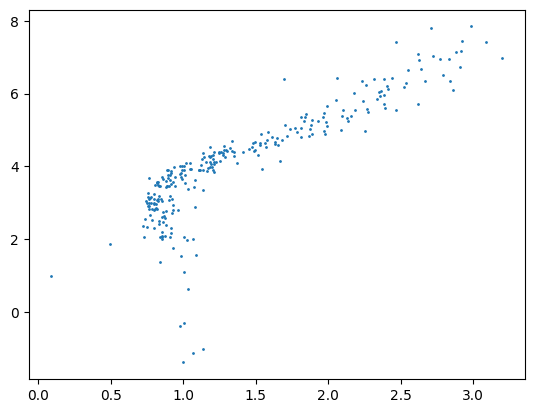

In [16]:
plt.figure()
k=-df['mu']+df['ks_m']

bprp=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']

plt.scatter(bprp,k,s=1)


plt.scatter(bprp,k,s=10,c=ebv)
plt.colorbar()

plt.ylim(10,-5)

In [22]:
ebv_sfd.mean()

0.016093545

(array([8.07820e+04, 1.57262e+05, 1.68670e+04, 1.94000e+02, 3.50000e+01,
        8.00000e+00, 3.00000e+00, 2.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([0.00255067, 0.01325305, 0.02395543, 0.03465781, 0.04536019,
        0.05606258, 0.06676496, 0.07746734, 0.08816972, 0.0988721 ,
        0.10957448]),
 <BarContainer object of 10 artists>)

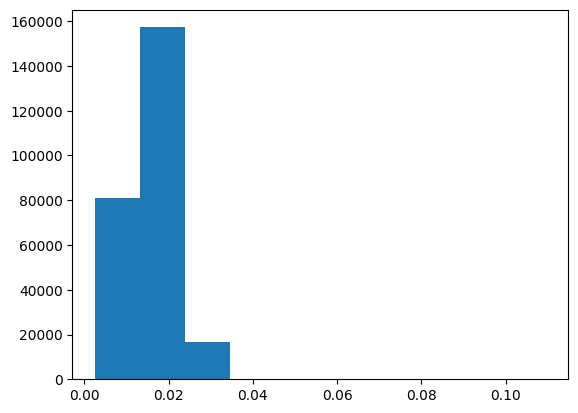

In [25]:
plt.hist(ebv_sfd)

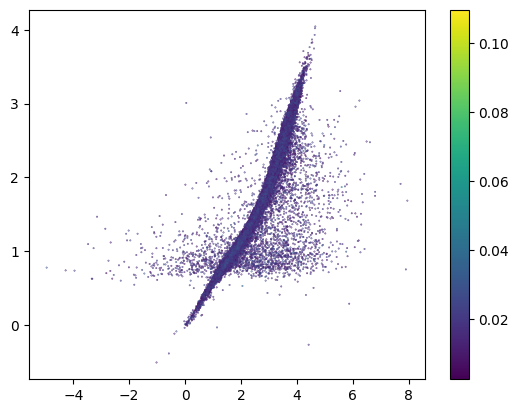

In [28]:
plt.figure()
k=-df['mu']+df['ks_m']
gk=df['phot_g_mean_mag']-df['ks_m']

bprp=df['phot_bp_mean_mag']-df['phot_rp_mean_mag']

plt.scatter(gk,bprp,c=ebv_sfd,s=0.11)
plt.colorbar()



#plt.ylim(10,-5)

In [23]:
from astropy.coordinates import SkyCoord
from dustmaps.bayestar import BayestarQuery
coords = SkyCoord(df['ra'].values*u.degree, df['dec'].values*u.degree, frame='icrs')
sfd = BayestarQuery()
ebv = sfd(coords)

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 46.332 s
  pix_info:   0.736 s
   samples:  29.126 s
      best:   5.451 s
       nan:   0.072 s
      sort:  10.877 s
       idx:   0.068 s


In [26]:
sfd.distances

<Quantity [ 0.06309573,  0.06683439,  0.07079458,  0.07498942,  0.07943282,
            0.08413951,  0.08912509,  0.09440609,  0.1       ,  0.10592537,
            0.11220185,  0.11885022,  0.12589254,  0.13335214,  0.14125375,
            0.14962357,  0.15848932,  0.1678804 ,  0.17782794,  0.18836491,
            0.19952623,  0.2113489 ,  0.22387211,  0.23713737,  0.25118864,
            0.26607251,  0.28183829,  0.29853826,  0.31622777,  0.33496544,
            0.35481339,  0.3758374 ,  0.39810717,  0.4216965 ,  0.44668359,
            0.47315126,  0.50118723,  0.53088444,  0.56234133,  0.59566214,
            0.63095734,  0.66834392,  0.70794578,  0.74989421,  0.79432823,
            0.84139514,  0.89125094,  0.94406088,  1.        ,  1.05925373,
            1.12201845,  1.18850223,  1.25892541,  1.33352143,  1.41253754,
            1.49623566,  1.58489319,  1.67880402,  1.77827941,  1.88364909,
            1.99526231,  2.11348904,  2.23872114,  2.37137371,  2.51188643,
            

(0.0, 2000.0)

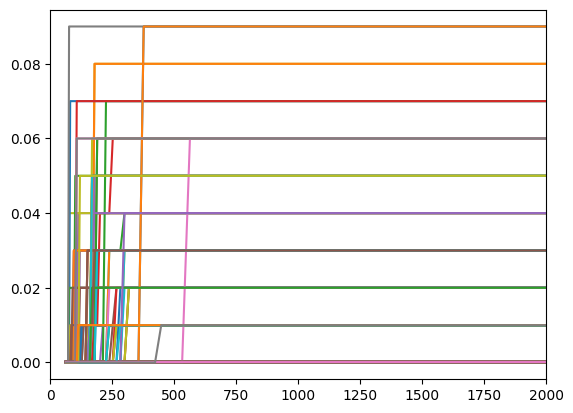

In [28]:
[plt.plot(sfd.distances*1000,ebv[i]) for i in range(len(ebv))]
plt.xlim(0,2000)

In [29]:
ebv_sfd

array([0.02634107, 0.02524918, 0.0240491 , 0.02517697, 0.02626078,
       0.0276983 , 0.02751456, 0.02435499, 0.02467137, 0.02491971,
       0.02911049, 0.02943039, 0.02914334, 0.03121955, 0.02466607,
       0.02438193, 0.02614868, 0.02719697, 0.02501733, 0.02554233,
       0.02555389, 0.02470891, 0.02805555, 0.02500086, 0.02508021,
       0.0272885 , 0.03114402, 0.030277  , 0.03692007, 0.03426119,
       0.03397814, 0.03548642, 0.03583025, 0.02565553, 0.02612356,
       0.02610331, 0.02684082, 0.02720388, 0.02861653, 0.03289758,
       0.03124183, 0.03223668, 0.03753466, 0.03415554, 0.03787008,
       0.03451768, 0.03604513, 0.03655316, 0.03610401, 0.03555847,
       0.03566682, 0.03564503, 0.03566354, 0.03537653, 0.03414226,
       0.0378108 , 0.03968839, 0.02675461, 0.0271202 , 0.02657522,
       0.02920365, 0.02937727, 0.03107819, 0.02993232, 0.02798218,
       0.02944492, 0.03026097, 0.03113608, 0.03076561, 0.03145985,
       0.03255548, 0.03431903, 0.03554962, 0.03586883, 0.03792

In [35]:
ebv

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.06, 0.06, 0.06],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

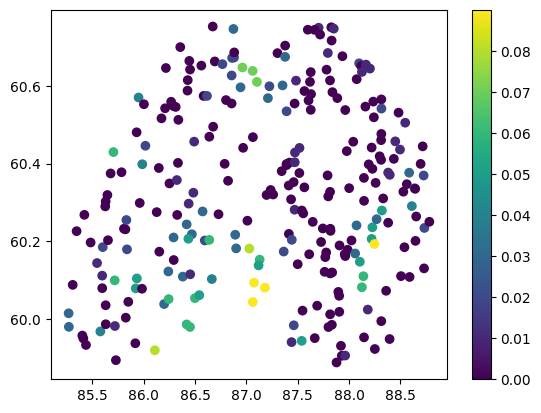

In [36]:
plt.scatter(l[df.index],b[df.index],c=ebv.max(-1)[df.index])
plt.colorbar()

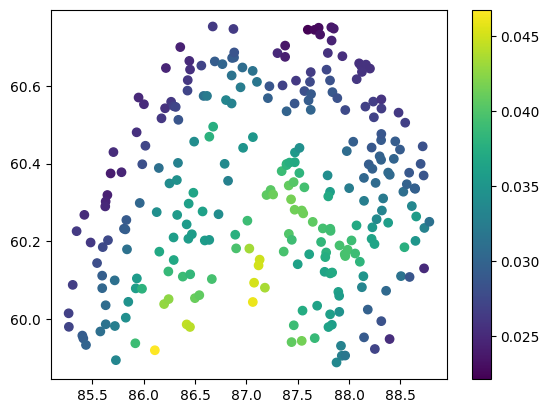

In [24]:
plt.scatter(l[df.index],b[df.index],c=ebv_sfd[df.index])
plt.colorbar()

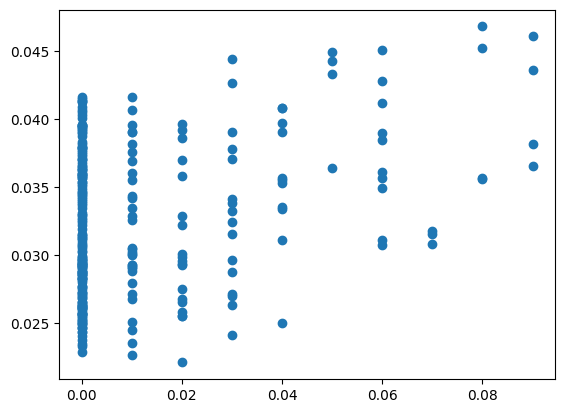

In [23]:
plt.scatter(ebv.max(-1)[df.index],ebv_sfd)

In [ ]:
df=df[(df['b']<60.2)*(df['l']<87.3)*(df['l']>86.8)]

In [ ]:
df['b']=b
df['l']=l

In [ ]:
np.abs(b).min()

59.86436233002429

In [ ]:
df

,Unnamed: 0,ks_m,mu,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,j_m,h_m,g_mean_psf_mag,r_mean_psf_mag,i_mean_psf_mag,z_mean_psf_mag,y_mean_psf_mag,ra,dec,b
0,0,12.562000,10.476117,14.094087,14.433761,13.581223,12.982000,12.615000,14.485600,14.087300,13.933700,13.895600,13.861000,219.912661,48.246113,85.347239
1,1,12.547000,9.283242,13.845118,14.142143,13.384192,12.878000,12.615000,14.192200,13.850100,13.766100,13.729100,13.703900,219.508989,48.271598,85.705879
2,2,13.195000,10.357190,14.541446,14.842862,14.075369,13.549000,13.280000,14.889300,14.529400,14.429400,14.413000,14.382500,219.587681,48.292911,85.678528
3,3,12.939000,10.125250,14.340210,14.655828,13.856369,13.350000,13.002000,14.695900,14.348300,14.218600,14.194700,14.180000,219.889154,48.318248,85.483768
4,4,12.005000,8.009458,13.654243,14.038837,13.104540,12.439000,12.067000,14.110900,13.626200,13.474300,13.417200,13.388000,219.852192,48.372946,85.602005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4379,4379,12.225932,8.447610,15.103568,15.700675,14.362144,12.772951,12.318426,14.699723,14.131225,13.922588,13.816837,13.756662,218.794921,49.345065,88.004268
4380,4380,12.215474,7.277026,15.385007,16.356857,14.378964,13.035361,12.373904,16.734508,15.523854,14.780819,14.453584,14.299404,218.755712,49.444184,88.191730
4381,4381,13.524289,8.880068,16.225775,17.005501,15.370187,14.302498,13.677158,17.325458,16.233089,15.749402,15.534239,15.416721,218.713223,49.568946,88.421245
4382,4382,13.630884,6.935322,17.329750,18.785749,16.132293,14.428442,13.882072,19.147061,17.951200,16.588913,16.003500,15.710284,218.956558,49.617030,88.298481


In [6]:
ebv

array([0.02634107, 0.02524918, 0.0240491 , 0.02517697, 0.02626078,
       0.0276983 , 0.02751456, 0.02435499, 0.02467137, 0.02491971,
       0.02911049, 0.02943039, 0.02914334, 0.03121955, 0.02466607,
       0.02438193, 0.02614868, 0.02719697, 0.02501733, 0.02554233,
       0.02555389, 0.02470891, 0.02805555, 0.02500086, 0.02508021,
       0.0272885 , 0.03114402, 0.030277  , 0.03692007, 0.03426119,
       0.03397814, 0.03548642, 0.03583025, 0.02565553, 0.02612356,
       0.02610331, 0.02684082, 0.02720388, 0.02861653, 0.03289758,
       0.03124183, 0.03223668, 0.03753466, 0.03415554, 0.03787008,
       0.03451768, 0.03604513, 0.03655316, 0.03610401, 0.03555847,
       0.03566682, 0.03564503, 0.03566354, 0.03537653, 0.03414226,
       0.0378108 , 0.03968839, 0.02675461, 0.0271202 , 0.02657522,
       0.02920365, 0.02937727, 0.03107819, 0.02993232, 0.02798218,
       0.02944492, 0.03026097, 0.03113608, 0.03076561, 0.03145985,
       0.03255548, 0.03431903, 0.03554962, 0.03586883, 0.03792

(array([238., 517., 352., 533., 301., 275., 652., 638., 585., 293.]),
 array([85.20878252, 85.57072423, 85.93266595, 86.29460767, 86.65654938,
        87.0184911 , 87.38043281, 87.74237453, 88.10431624, 88.46625796,
        88.82819967]),
 <BarContainer object of 10 artists>)

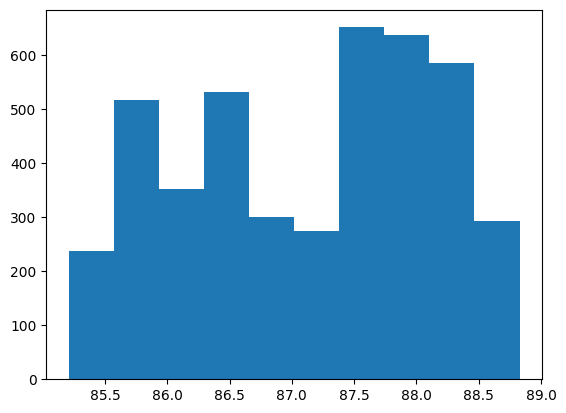

In [ ]:
plt.hist(l)

In [ ]:
ebv_map

array([0.00892611, 0.00903893, 0.00909479, ..., 0.01552308, 0.01594147,
       0.01596942], dtype=float32)

In [ ]:
0.02*3.1

0.062000000000000006

Depending on what I'm inferring you can take less values

In [ ]:
idx=100
idx%1000

100

In [ ]:
0.02*3

0.06

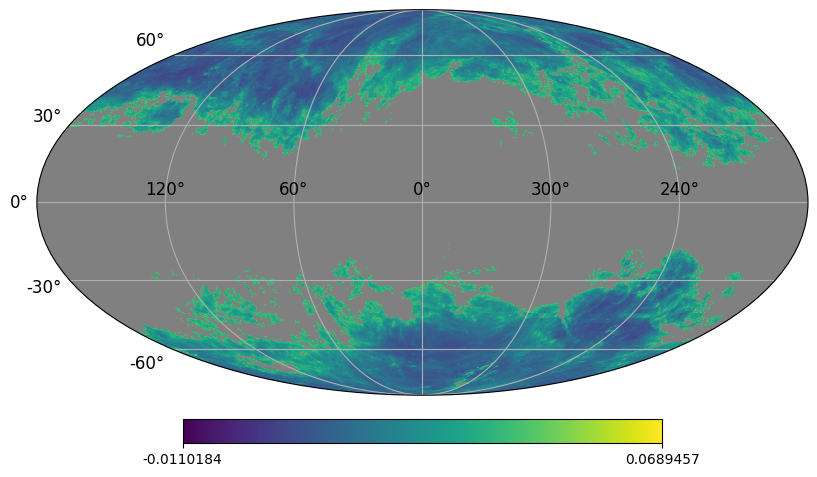

In [98]:
hp.projview(ebv_map, coord=["G"], graticule=True, graticule_labels=True, projection_type="mollweide"
);

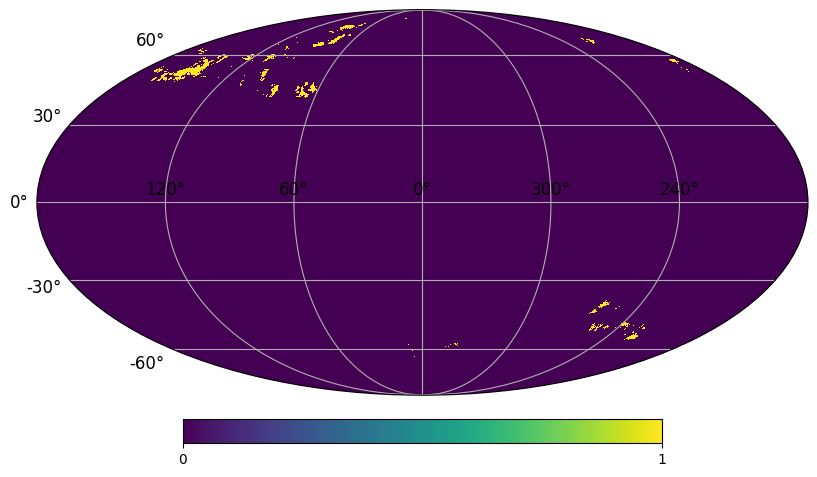

In [99]:
hp.projview(np.where(ebv_map, (ebv_map<0.008), np.nan), coord=["G"], graticule=True, graticule_labels=True, projection_type="mollweide"
);

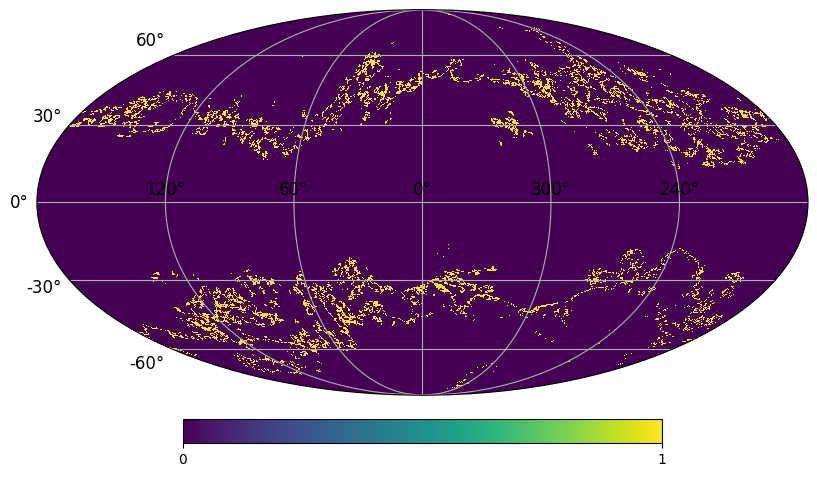

In [ ]:
hp.projview(np.where(ebv_map, (ebv_map>0.04), np.nan), coord=["G"], graticule=True, graticule_labels=True, projection_type="mollweide"
);

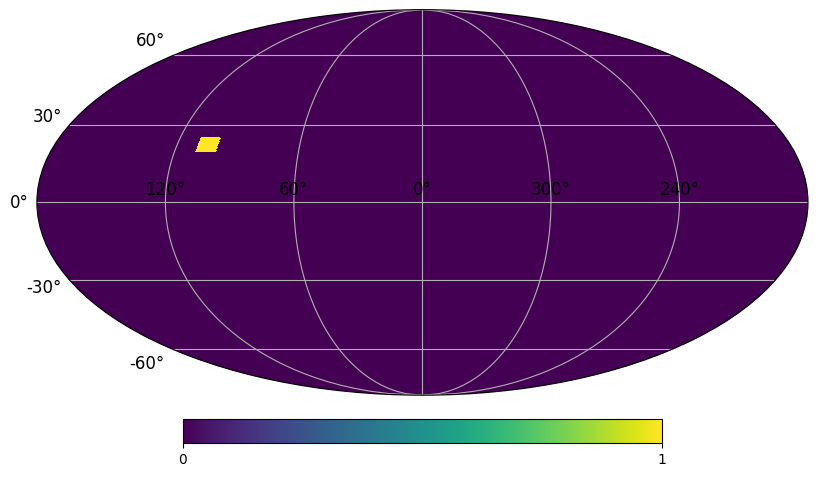

In [ ]:
hp.projview(np.where(ebv_map, (np.abs(l)<110)*(np.abs(l)>100)*((b)<25)*((b)>19), np.nan), coord=["G"], graticule=True, graticule_labels=True, projection_type="mollweide"
);

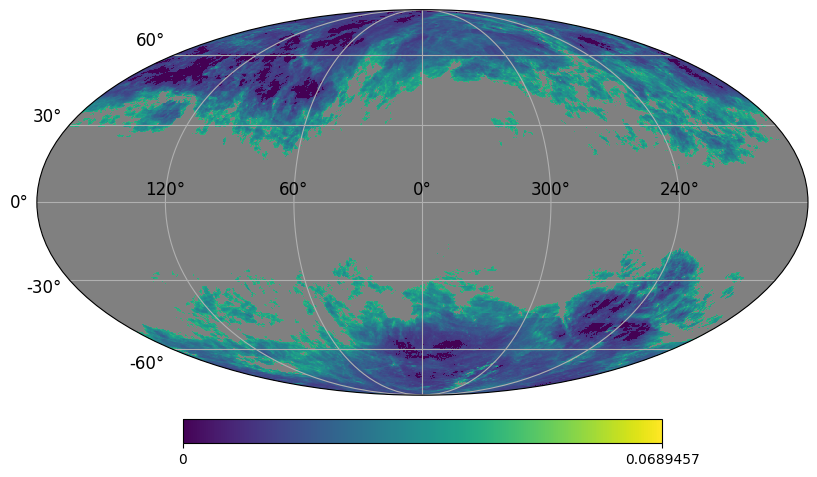

In [ ]:

hp.projview(ebv_map*(ebv_map>0.01), coord=["G"], graticule=True, graticule_labels=True, projection_type="mollweide"
);

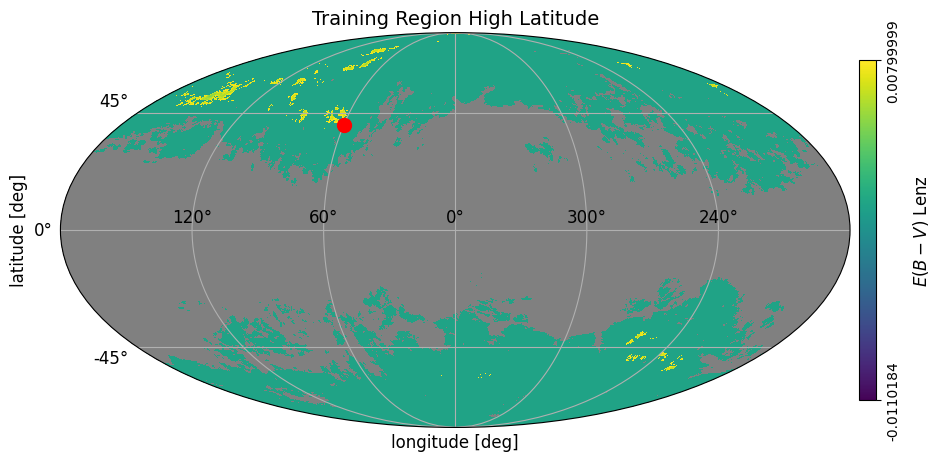

In [ ]:
# classic healpy mollweide projections plot with graticule and axis labels and vertical color bar, when min and max is set
# to be different than the min, max of the data, the colorbar is extended
# with title, GEO convention for longitude
hp.projview(
    ebv_map*(ebv_map<0.008),
    coord=["G"],
    graticule=True,
    graticule_labels=True,
    unit="$E(B-V)$ Lenz",
    xlabel="longitude [deg]",
    ylabel="latitude [deg]",
    cb_orientation="vertical",
    latitude_grid_spacing=45,
    projection_type="mollweide",
    title="Training Region High Latitude");
# newprojplot knows about the flip in plotting longitude
hp.newprojplot(theta=np.radians(50), phi=np.radians(60), marker="o", color="r", markersize=10);

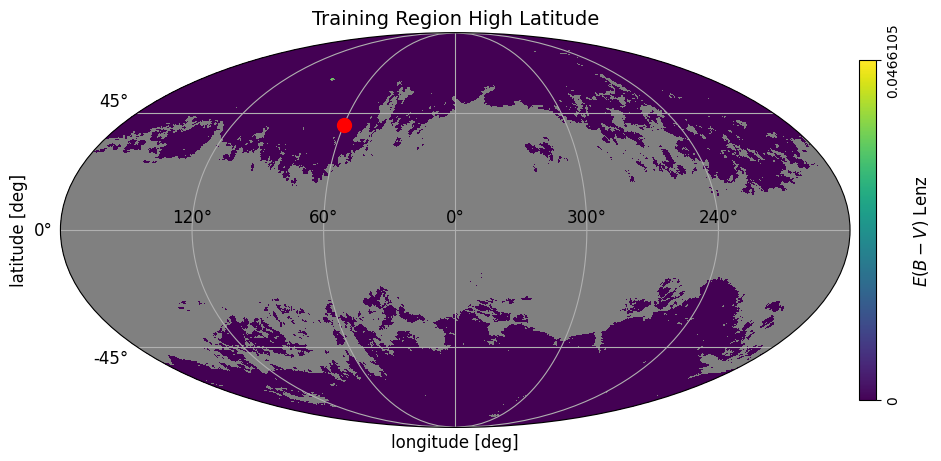

In [ ]:
# classic healpy mollweide projections plot with graticule and axis labels and vertical color bar, when min and max is set
# to be different than the min, max of the data, the colorbar is extended
# with title, GEO convention for longitude
hp.projview(
    ebv_map*(ebv_map>0.03)*(b>60)*(l>60)*(l<120)*(b<65),
    coord=["G"],
    graticule=True,
    graticule_labels=True,
    unit="$E(B-V)$ Lenz",
    xlabel="longitude [deg]",
    ylabel="latitude [deg]",
    cb_orientation="vertical",
    latitude_grid_spacing=45,
    projection_type="mollweide",
    title="Training Region High Latitude");
# newprojplot knows about the flip in plotting longitude
hp.newprojplot(theta=np.radians(50), phi=np.radians(60), marker="o", color="r", markersize=10);

In [100]:
idx=(ebv_map>0.03)*(b>60)*(l>60)*(l<120)*(b<65)

In [101]:
lval=l[idx].mean()

In [102]:
lval

87.15033802215787

In [103]:
bval=b[idx].mean()

In [104]:
bval

60.314953648557584

In [105]:
sfd = SFDQuery()
ebv = sfd(coords)

In [106]:
ebv

array([0.01177644, 0.01124428, 0.01224075, ..., 0.01558377, 0.01570562,
       0.01621677], dtype=float32)

In [40]:
ebv.min()

0.0004296136

1.0526945293550967

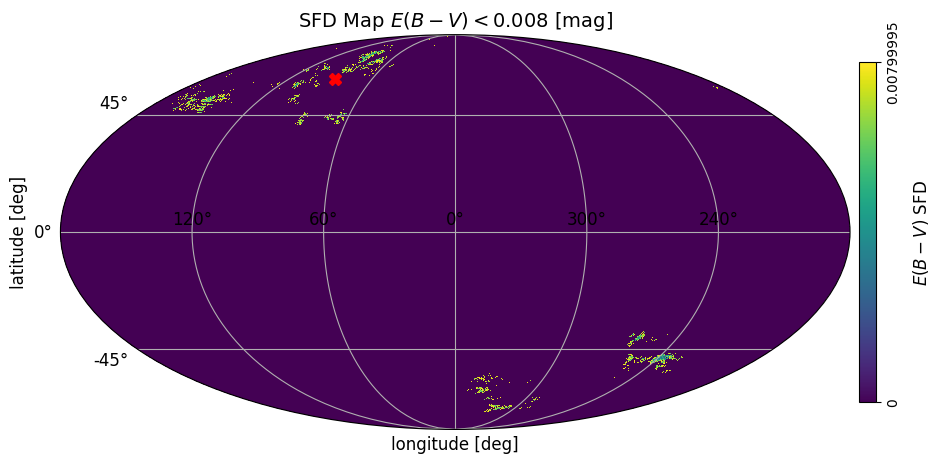

In [111]:
# classic healpy mollweide projections plot with graticule and axis labels and vertical color bar, when min and max is set
# to be different than the min, max of the data, the colorbar is extended
# with title, GEO convention for longitude
hp.projview(
    (ebv)*(ebv_map>0)*(ebv<0.008),
    coord=["G"],
    graticule=True,
    graticule_labels=True,
    unit="$E(B-V)$ SFD",
    xlabel="longitude [deg]",
    ylabel="latitude [deg]",
    cb_orientation="vertical",
    latitude_grid_spacing=45,
    projection_type="mollweide",
    title="SFD Map $E(B-V)<0.008$ [mag]");
# newprojplot knows about the flip in plotting longitude
hp.newprojplot(theta=0.5, phi=np.radians(lval), marker="X", color="r", markersize=8,label='Test Region');


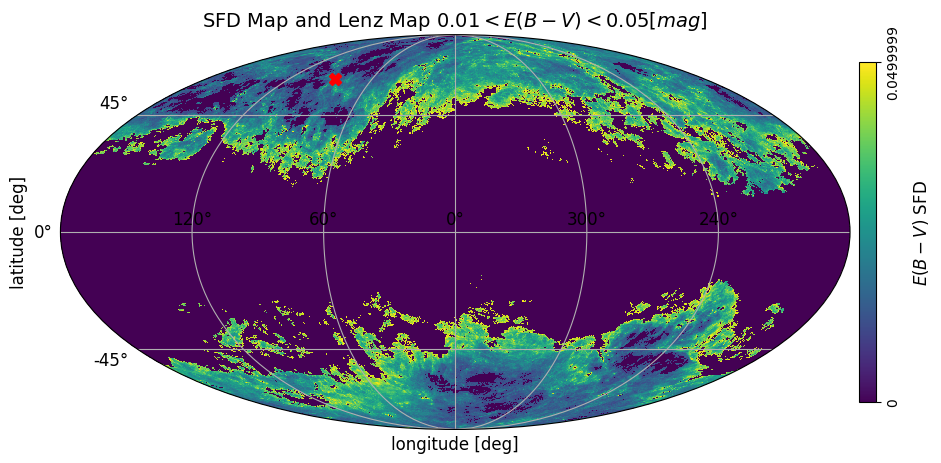

In [64]:
# classic healpy mollweide projections plot with graticule and axis labels and vertical color bar, when min and max is set
# to be different than the min, max of the data, the colorbar is extended
# with title, GEO convention for longitude
hp.projview(
    (ebv)*(ebv_map>0.01)*(ebv_map<0.05)*(ebv>0.01)*(ebv<0.05),
    coord=["G"],
    graticule=True,
    graticule_labels=True,
    unit="$E(B-V)$ SFD",
    xlabel="longitude [deg]",
    ylabel="latitude [deg]",
    cb_orientation="vertical",
    latitude_grid_spacing=45,
    projection_type="mollweide",
    title="SFD Map and Lenz Map $0.01<E(B-V)<0.05 [mag]$");
# newprojplot knows about the flip in plotting longitude
hp.newprojplot(theta=0.5, phi=np.radians(lval), marker="X", color="r", markersize=8,label='Test Region');


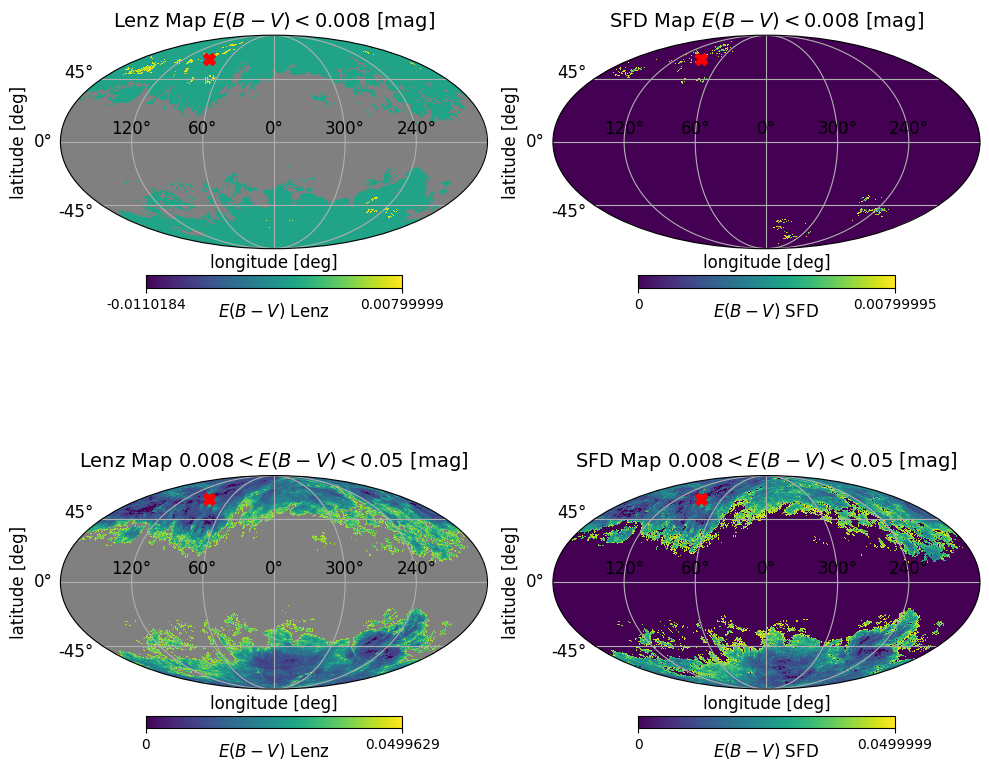

In [91]:
fig = plt.figure(figsize=(10, 10))

# Define the number of rows and columns for the subplots
n_rows, n_cols = 2, 2

for i in range(n_rows * n_cols):
    if(i==0):
    # Create a new subplot
        ax = fig.add_subplot(n_rows, n_cols, i + 1, projection='mollweide')
        
        # Plot the map using healpy
        hp.projview(
        ebv_map*(ebv_map<0.008),
        coord=["G"],
        graticule=True,
        graticule_labels=True,
        unit="$E(B-V)$ Lenz",
        xlabel="longitude [deg]",
        ylabel="latitude [deg]",
        cb_orientation="horizontal",
        latitude_grid_spacing=45,
        projection_type="mollweide",
        title="Lenz Map $E(B-V)<0.008$ [mag]",sub=(n_rows, n_cols, i + 1),
            hold=True);
    # newprojplot knows about the flip in plotting longitude
        hp.newprojplot(theta=0.5, phi=np.radians(lval), marker="X", color="r", markersize=8,label='Test Region');


    if(i==1):
    # Create a new subplot
        ax = fig.add_subplot(n_rows, n_cols, i + 1, projection='mollweide')
        
        # Plot the map using healpy
        hp.projview(
    (ebv)*(ebv_map>0)*(ebv<0.008),
    coord=["G"],
    graticule=True,
    graticule_labels=True,
    unit="$E(B-V)$ SFD",
    xlabel="longitude [deg]",
    ylabel="latitude [deg]",
    cb_orientation="horizontal",
    latitude_grid_spacing=45,
    projection_type="mollweide",
    title="SFD Map $E(B-V)<0.008$ [mag]",sub=(n_rows, n_cols, i + 1),
            hold=True);
    # newprojplot knows about the flip in plotting longitude
        hp.newprojplot(theta=0.5, phi=np.radians(lval), marker="X", color="r", markersize=8,label='Test Region');


    if(i==2):
    # Create a new subplot
        ax = fig.add_subplot(n_rows, n_cols, i + 1, projection='mollweide')
        
        # Plot the map using healpy
        hp.projview(
    (ebv_map)*(ebv_map>0.008)*(ebv_map<0.05),
    coord=["G"],
    graticule=True,
    graticule_labels=True,
    unit="$E(B-V)$ Lenz",
    xlabel="longitude [deg]",
    ylabel="latitude [deg]",
    cb_orientation="horizontal",
    latitude_grid_spacing=45,
    projection_type="mollweide",
    title="Lenz Map $0.008<E(B-V)<0.05$ [mag]",sub=(n_rows, n_cols, i + 1),
            hold=True);
    # newprojplot knows about the flip in plotting longitude
        hp.newprojplot(theta=0.5, phi=np.radians(lval), marker="X", color="r", markersize=8,label='Test Region');



    # Add a custom point (commented out since lval is not defined)
    # hp.newprojplot(theta=0.5, phi=np.radians(lval), marker="X", color="r", markersize=8, label='Test Region')

# Add colorbar (healpy automatically adds colorbars to individual subplots)

    if(i==3):
    # Create a new subplot
        ax = fig.add_subplot(n_rows, n_cols, i + 1, projection='mollweide')
        
        # Plot the map using healpy
        hp.projview(
    (ebv)*(ebv>0.008)*(ebv<0.05)*(ebv_map>0),
    coord=["G"],
    graticule=True,
    graticule_labels=True,
    unit="$E(B-V)$ SFD",
    xlabel="longitude [deg]",
    ylabel="latitude [deg]",
    cb_orientation="horizontal",
    latitude_grid_spacing=45,
    projection_type="mollweide",
    title="SFD Map $0.008<E(B-V)<0.05$ [mag]",sub=(n_rows, n_cols, i + 1),
            hold=True);
    # newprojplot knows about the flip in plotting longitude
        hp.newprojplot(theta=0.5, phi=np.radians(lval), marker="X", color="r", markersize=8,label='Test Region');


plt.tight_layout()
plt.show()

In [92]:
lval

87.15033802215787